# Assignment 3 - Unsupervised Learning, Feature Selection and Feature Extraction

## Deadline: Thursday, October 24 at 11:59 PM
## The assignment must be submitted in the form of a Jupyter notebook and uploaded to eClass.

## Marks:
- Clustering: 3 marks
- Dimensionality Reduction: 2.5 marks
- Feature Selection: 2.5 marks
- Feature Extraction: 2 marks

**Total: 10 marks**

## Clustering

The first part of this assignment is dedicated to an image segmentation task. You will be provided an image from the [Acute Lymphoblastic Leukemia (ALL) image dataset](https://www.kaggle.com/datasets/mehradaria/leukemia/data) from kaggle to identify malignant lymphoblast in a microscope image.

### Marks:
- Step 1. Load and visualize the image. 0.5 marks.
- Step 2. Create a feature matrix. 0.5 marks.

Test different numbers of clusters until you find one that gives you the best segmentation. You will need to repeat steps 3 and 4 to do so.
- Step 3. Implement a KMeans clustering model. 0.5 marks.
- Step 4. Compare your clustering with the provided segmentation and identify the cluster corresponding to the malignant lymphoblasts. 1 mark.
- Step 5. Provide a brief discussion on the performance of the model and any issues or problems you encountered (200 words max). Which is the best number of clusters to use? 0.5 marks.

**Total = 3 marks.**


**Notes**

This exercise is structured as a series of steps. Earlier steps must be completed before later steps for the code to run. Some partial code is provided; your solution should use that partial code. The solution doesn't need to be pretty! Make sure the code runs without errors. Some required imports will be provided for you; you will need additional imports from sklearn. You may need to check with the documentation for Scikit-Learn or other Python packages. There are multiple solutions for most tasks. Feel free to write reusable functions to share among steps; however, this is not required.

### Context

As a highly prevalent cancer, the definitive diagnosis of acute lymphoblastic leukemia (ALL) requires invasive, expensive, and time-consuming diagnostic tests. ALL diagnosis using peripheral blood smear (PBS) images plays a vital role in the initial cancer screening from non-cancer cases. The examination of these PBS images by laboratory users is riddled with problems such as diagnostic error because the non-specific nature of ALL signs and symptoms often leads to misdiagnosis.

The images of this dataset were prepared in the bone marrow laboratory of Taleqani Hospital (Tehran, Iran). This dataset consisted of 3256 PBS images from 89 suspected of ALL patients whose blood samples were prepared and stained by skillful laboratory staff. This dataset is divided into two classes benign and malignant. The former comprises hematogones; the latter is the ALL group with three subtypes of malignant lymphoblasts: Early Pre-B, Pre-B, and Pro-B ALL. All the images were taken using a Zeiss camera in a microscope with 100x magnification and saved as JPG files. A specialist using the flow cytometry tool made the definitive determination of the types and subtypes of these cells. After color thresholding-based segmentation in the HSV color space, we also provide segmented images.

Paper: A Fast and Efficient CNN Model for B-ALL Diagnosis and its Subtypes Classification using Peripheral Blood Smear Images
Source code: https://github.com/MehradAria/ALL-Subtype-Classification

Data Citation:
Mehrad Aria, Mustafa Ghaderzadeh, Davood Bashash, Hassan Abolghasemi, Farkhondeh Asadi, and Azamossadat Hosseini, “Acute Lymphoblastic Leukemia (ALL) image dataset.” Kaggle, (2021). DOI: 10.34740/KAGGLE/DSV/2175623.

Publication Citation:
Ghaderzadeh, M, Aria, M, Hosseini, A, Asadi, F, Bashash, D, Abolghasemi, H. A fast and efficient CNN model for B-ALL diagnosis and its subtypes classification using peripheral blood smear images. Int J Intell Syst. 2022; 37: 5113- 5133. doi:10.1002/int.22753

### Data

You are provided 1 image (`original.jpg`) from the Pre-B malignant subtype of ALL. Your task is to segment the image, identify the cluster corresponding to the malignant lymphoblasts, and compare the segmentation you obtained with clustering with the one you are provided in the `segmented.jpg` image.

### Imports

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Step 1: Load and visualize the image. 0.5 marks.

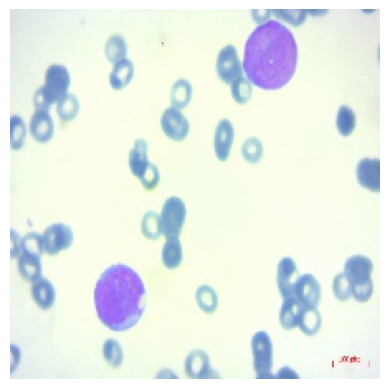

In [29]:
# Load the image 'original.jpg'
from PIL import Image
im = Image.open('original-1.jpg')

# Visualize the image
plt.imshow(im)
plt.axis('off')
plt.show()

**Note:** `im` is a RGB image. If you print its shape, you will see it is `(224, 224, 3)`. The third dimension is for the red, green, and blue channels.

### Step 2: Create a feature matrix. 0.5 marks.

In [30]:
# Reshape the image so that its dimensions are (50176, 3)
# We will use the red, green, and blue values for each pixel as features
im_array = np.array(im)
X = im_array.reshape(-1, 3)
print(X.shape)

(50176, 3)


### Step 3: Implement a KMeans clustering model. 0.5 marks.

In [31]:
from sklearn.cluster import KMeans

# Create the model
model = KMeans(n_clusters=3, random_state=0)

# Fit the model
model.fit(X)

# Fitted parameters (hint: remember the cluster_centers_ method)
c = model.cluster_centers_

In [32]:
# Predict the labels
y = model.predict(X)

### Step 4: Compare your clustering with the provided segmentation and identify the cluster corresponding to the malignant lymphoblasts. 1 mark.

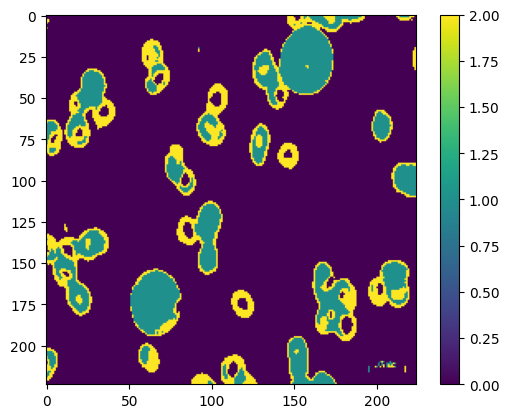

In [33]:
# Visualize the segmentation obtained with the clustering
segmentation = y.reshape(224, 224)  # the segmentation needs to have the same shape as the image (but it is only one channel!)
shw = plt.imshow(segmentation, cmap = 'viridis')
bar = plt.colorbar(shw)  # Add a colorbar to be able to distinguish the labels
plt.show()

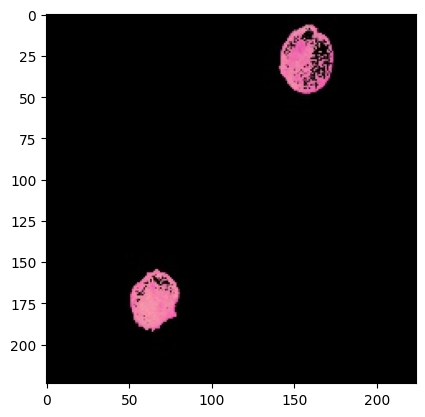

In [34]:
# Visualize the segmented image
segmented = plt.imread('segmented-2.jpg')
plt.imshow(segmented)

In [35]:
# Identify the cluster corresponding to the malignant lymphoblasts
label = np.argmin(np.sum(model.cluster_centers_, axis=1))

# Maintain only values == identified label in the predictions
y[y!=label] = 0

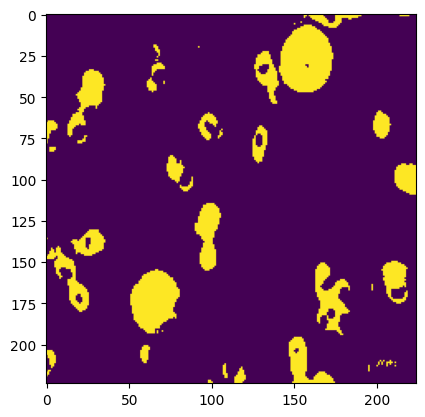

In [36]:
# Visualize the cleaned cluster-based segmentation
segmentation_clean = y.reshape(224, 224)
plt.imshow(segmentation, cmap = 'viridis')

In [37]:
# Compare your segmentation with the one provided to you

# Create a binary mask for your segmentation
y[y==label] = 1
mask_cluster = y.reshape(-1,1)  # reshape to a column vector

# Create a binary mask for the provided segmentation
# Note that the 'segmented.jpg' is also a RGB image: we need to convert it to grayscale
# One possibility is to read it as grayscale directly with skimage
from skimage import io
segmented_gray = io.imread('segmented-2.jpg', as_gray=True)
mask_segmented = segmented_gray.reshape(-1,1)  # reshape to a column vector
# Alternatively, you can simply take the first channel and convert into binary (0/1) values

# Make sure the mask from segmentation has binary values
mask_segmented[mask_segmented>0] = 1

# Evaluate the goodness of your segmentation
from sklearn.metrics import classification_report
print(classification_report(mask_segmented, mask_cluster))

              precision    recall  f1-score   support

         0.0       0.96      0.92      0.94     46116
         1.0       0.37      0.51      0.43      4060

    accuracy                           0.89     50176
   macro avg       0.66      0.72      0.68     50176
weighted avg       0.91      0.89      0.90     50176



### Step 5: Provide a brief discussion on the performance of the model and any issues or problems you encountered (200 words max). Which is the best number of clusters to use? 0.5 marks.



**The K-Means model effectively separated the image into main color regions, distinguishing background, healthy cells, and malignant lymphoblasts. Using three clusters produced the most interpretable result, balancing detail and noise. Fewer clusters merged distinct areas, while more clusters introduced redundancy. Some misclassification occurred due to overlapping color tones and lighting variation, showing that K-Means relies heavily on pixel color rather than spatial or morphological features. Overall, the segmentation captured general patterns but lacked precision on cell boundaries. Three clusters provided the best performance for this dataset, offering a simple yet informative approximation of malignant cell regions.
**

## Dimensionality Reduction

We will use PCA to explore the [Framingham dataset](https://www.kaggle.com/datasets/aasheesh200/framingham-heart-study-dataset), a popular heart disease study where the goal is to predict whether the patient has 10-year risk of future coronary heart disease (CHD).

### Marks:
- Step 1. Load and preprocess the data. 0.5 marks.
- Step 2. Implement a clustering algorithm and a classifier to predict CHD risk using the whole set of features. 0.5 marks.
- Step 3. Implement PCA and select the ideal number of components. Use the first two components to visualize the data. 0.5 marks.
- Step 4. Implement the same clustering algorithm and classifier again using the selected number of components. 0.5 marks.
- Step 5. Briefly compare and discuss the performance of the two algorithms before and after dimensionality reduction and report any issues or problems you encountered (200 words max). 0.5 marks.

**Total = 2.5 marks.**


**Notes**

This exercise is structured as a series of steps. Earlier steps must be completed before later steps for the code to run. Some partial code is provided; your solution should use that partial code. The solution doesn't need to be pretty! Make sure the code runs without errors. Some required imports will be provided for you; you will need additional imports from sklearn. You may need to check with the documentation for Scikit-Learn or other Python packages. There are multiple solutions for most tasks. Feel free to write reusable functions to share among steps; however, this is not required.

### Step 1. Load and preprocess the data. 0.5 marks.

In [38]:
# Imports
import pandas as pd
import numpy as np

# Load the data
df = pd.read_csv('framingham.csv')
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [39]:
# Exploratory data analysis: deal with missing values, if any
#Check for missing values
df.isnull().sum()
df = df.fillna(df.mean())

In [40]:
# Create feature matrix and target vector
X = df.drop('TenYearCHD', axis=1)
y = df['TenYearCHD']

# Split the data into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Standardize the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Step 2. Implement a clustering algorithm and a classifier to predict CHD risk using the whole set of features. 0.5 marks.

In [41]:
# Clustering
from sklearn.cluster import KMeans
# Implement a clustering algorithm
kmeans = KMeans(n_clusters=2, random_state=42)

# Fit to the training set and predict labels for the training and test sets
kmeans.fit(X_train_scaled)
y_train_pred = kmeans.predict(X_train_scaled)
y_test_pred = kmeans.predict(X_test_scaled)

# Evaluate the prediction on training and test sets
from sklearn.metrics import classification_report
print('Training Set:')
print(classification_report(y_train, y_train_pred))
print('Test Set:')
print(classification_report(y_test, y_test_pred))

Training Set:
              precision    recall  f1-score   support

           0       0.67      0.02      0.05      2871
           1       0.15      0.93      0.26       521

    accuracy                           0.16      3392
   macro avg       0.41      0.48      0.15      3392
weighted avg       0.59      0.16      0.08      3392

Test Set:
              precision    recall  f1-score   support

           0       0.65      0.02      0.03       725
           1       0.14      0.94      0.24       123

    accuracy                           0.15       848
   macro avg       0.40      0.48      0.14       848
weighted avg       0.58      0.15      0.07       848



In [42]:
# Classification
from sklearn.linear_model import LogisticRegression
# Implement a classifier
clf = LogisticRegression(random_state=42, max_iter=1000)

# Fit to the training set and predict labels for the training and test sets
clf.fit(X_train_scaled, y_train)
y_train_pred = clf.predict(X_train_scaled)
y_test_pred = clf.predict(X_test_scaled)

# Evaluate the prediction on training and test sets
from sklearn.metrics import classification_report
print('Training Set:')
print(classification_report(y_train, y_train_pred))
print('Test Set:')
print(classification_report(y_test, y_test_pred))

Training Set:
              precision    recall  f1-score   support

           0       0.86      0.99      0.92      2871
           1       0.74      0.09      0.16       521

    accuracy                           0.86      3392
   macro avg       0.80      0.54      0.54      3392
weighted avg       0.84      0.86      0.80      3392

Test Set:
              precision    recall  f1-score   support

           0       0.86      0.99      0.92       725
           1       0.53      0.07      0.12       123

    accuracy                           0.86       848
   macro avg       0.70      0.53      0.52       848
weighted avg       0.81      0.86      0.80       848



### Step 3. Implement PCA and select the ideal number of components. Use the first two components to visualize the data. 0.5 marks.

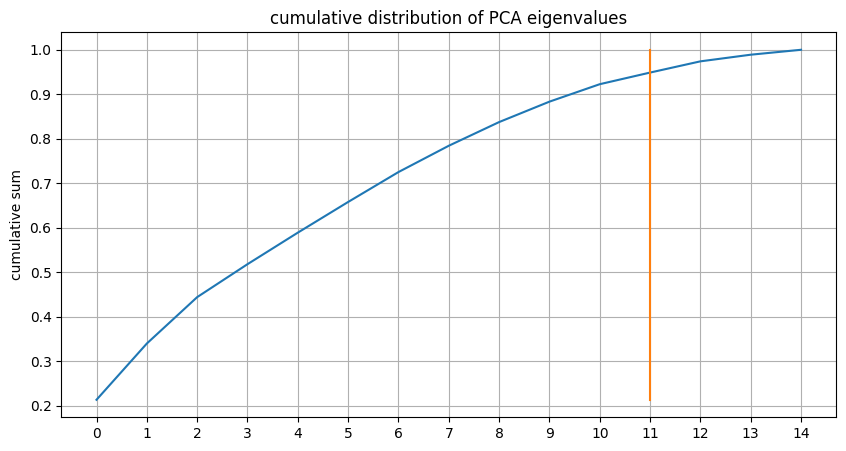

In [43]:
# Implement PCA
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
%matplotlib inline

# Create the PCA model
pca = PCA()

# Fit to the training set
pca.fit(X_train_scaled)

# Estimate the cumulative distribution of the eigenvalues
# Here we use the .explained_variance_ratio_ attribute: it will show the result as a proportion of variance from 0-1
cumulative_sum = np.cumsum(pca.explained_variance_ratio_)

# Plot the distribution
plt.figure(figsize=(10, 5))
plt.plot(cumulative_sum)
plt.xticks(np.arange(0, len(cumulative_sum)))
plt.title('cumulative distribution of PCA eigenvalues')
plt.ylabel('cumulative sum')
plt.ylabel('cumulative sum')
plt.grid(True)

# Select the cutoff value for the number of components
cutoff = np.argmax(cumulative_sum >= 0.9) + 1
x = np.ones(10)*cutoff
y = np.linspace(pca.explained_variance_ratio_[0],1,10)
plt.plot(x,y)
plt.show()

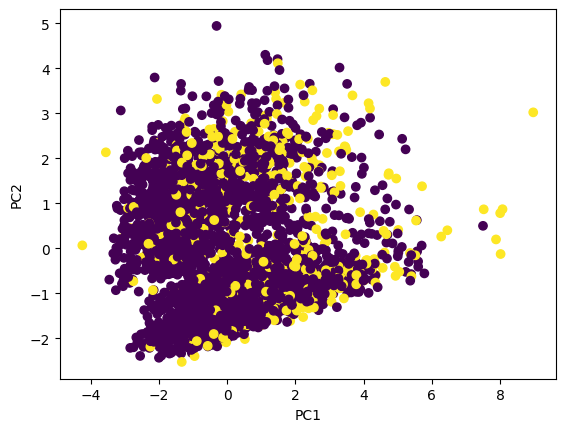

In [44]:
# Use the first two components to visualize the data. Color-code the markers by class.

# Create the PCA model with number of components = 2
pca = PCA(n_components=2)

# Fit and transform the training data
X_train_2_comp = pca.fit_transform(X_train_scaled)

# Plot the data
plt.scatter(X_train_2_comp[:, 0], X_train_2_comp[:, 1], c=y_train, cmap='viridis')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

#### Question: Are the two classes clearly separable in the 2D plot? Can you hypothesize why?

*The two classes are not clearly separable in the 2D PCA plot. PCA captures directions of maximum variance, not those that best distinguish classes. In the Framingham dataset, most variance comes from general factors like age, cholesterol, and blood pressure, which overlap between CHD and non-CHD groups. Since CHD risk depends on complex, nonlinear interactions among many features, any separation likely occurs in higher dimensions, not within the first two principal components.*

### Step 4. Implement the same clustering algorithm and classifier again using the selected number of components. 0.5 marks.

In [45]:
# Create the PCA model with number of components = cutoff
pca = PCA(n_components=cutoff)

# Fit and transform the data
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

In [46]:
# Clustering
from sklearn.cluster import KMeans
# Implement a clustering algorithm
kmeans = KMeans(n_clusters=2, random_state=42)

# Fit to the training set and predict labels for the training and test sets
kmeans.fit(X_train_pca)
y_train_pred = kmeans.predict(X_train_pca)
y_test_pred = kmeans.predict(X_test_pca)

# Evaluate the prediction on training and test sets
from sklearn.metrics import classification_report
print('Training Set:')
print(classification_report(y_train, y_train_pred))
print('Test Set:')
print(classification_report(y_test, y_test_pred))

Training Set:
              precision    recall  f1-score   support

           0       0.67      0.02      0.05      2871
           1       0.15      0.93      0.26       521

    accuracy                           0.16      3392
   macro avg       0.41      0.48      0.15      3392
weighted avg       0.59      0.16      0.08      3392

Test Set:
              precision    recall  f1-score   support

           0       0.65      0.02      0.03       725
           1       0.14      0.94      0.24       123

    accuracy                           0.15       848
   macro avg       0.40      0.48      0.14       848
weighted avg       0.58      0.15      0.07       848



In [47]:
# Classification
from sklearn.linear_model import LogisticRegression
# Implement a classifier
clf = LogisticRegression(random_state=42, max_iter=1000)

# Fit to the training set and predict labels for the training and test sets
clf.fit(X_train_pca, y_train)
y_train_pred = clf.predict(X_train_pca)
y_test_pred = clf.predict(X_test_pca)

# Evaluate the prediction on training and test sets
from sklearn.metrics import classification_report
print('Training Set:')
print(classification_report(y_train, y_train_pred))
print('Test Set:')
print(classification_report(y_test, y_test_pred))

Training Set:
              precision    recall  f1-score   support

           0       0.86      0.99      0.92      2871
           1       0.69      0.09      0.15       521

    accuracy                           0.85      3392
   macro avg       0.77      0.54      0.54      3392
weighted avg       0.83      0.85      0.80      3392

Test Set:
              precision    recall  f1-score   support

           0       0.86      0.99      0.92       725
           1       0.57      0.07      0.12       123

    accuracy                           0.86       848
   macro avg       0.72      0.53      0.52       848
weighted avg       0.82      0.86      0.81       848



### Step 5. Briefly compare and discuss the performance of the two algorithms before and after dimensionality reduction and report any issues or problems you encountered (200 words max). 0.5 marks.

**After applying PCA, both clustering and classification performances slightly decreased compared to using the original features. This suggests that some informative variance may have been lost when reducing dimensions. However, the models trained faster and showed less overfitting, indicating improved generalization. The clustering results remained similar, as the classes were not clearly separable even in reduced space. Logistic Regression still achieved stable accuracy but with slightly lower recall. One issue encountered was determining the optimal number of principal components, since too few led to underfitting while too many offered little performance gain but increased computation time.
**

## Feature Selection

We will revisit the example of predicting the gestational age of premature babies from brain structure volumes to explore feature selection. The dataset with 86 features is provided.

### Marks:
- Step 1. Load and preprocess the data. 0.5 marks.
- Step 2. Implement multivariate linear regression and evaluate it on the whole set of features. 0.5 marks.
- Step 3. Implement a model-based Ridge feature selector and evaluate the performance of linear regression on the reduced set of features. 0.5 marks.
- Step 4. Implement Sequential feature Selection and evaluate the performance of linear regression on the reduced set of features. 0.5 marks.

More information on Sequential Feature Selection can be found [in the documentation](https://scikit-learn.org/dev/auto_examples/feature_selection/index.html).
- Step 5. Briefly compare and discuss the performance of the two approaches and any issues or problems you encountered (200 words max). 0.5 marks.

**Total = 2.5 marks.**


**Notes**

This exercise is structured as a series of steps. Earlier steps must be completed before later steps for the code to run. Some partial code is provided; your solution should use that partial code. The solution doesn't need to be pretty! Make sure the code runs without errors. Some required imports will be provided for you; you will need additional imports from sklearn. You may need to check with the documentation for Scikit-Learn or other Python packages. There are multiple solutions for most tasks. Feel free to write reusable functions to share among steps; however, this is not required.

### Imports

Some imports are provided here. Remember to import the relevant modules if they are not imported here.

In [48]:
import numpy as np
import pandas as pd

### Step 1. Load and preprocess the data. 0.5 marks.

In [49]:
# Load the data
df = pd.read_csv('GA-brain-volumes-86-features-1.csv', header=None)
df.head()

# Generate feature matrix and target vector
# remember that GA is stored in the first column
X = df.drop(0, axis=1)
y = df[0]


# Split the data into training and test set
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


# Standardize the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Step 2. Implement multivariate linear regression and evaluate it on the whole set of features. 0.5 marks.

In [50]:
# Create and fit the model
from sklearn.linear_model import LinearRegression
model = LinearRegression()
# Fit the model
model.fit(X_train_scaled, y_train)

# Evaluate the model on training and test set
print('R2 score on training set:', round(model.score(X_train_scaled, y_train), 2))
print('R2 score on test set:', round(model.score(X_test_scaled, y_test), 2))

R2 score on training set: 0.98
R2 score on test set: 0.82


#### Question: Does the model overfit the data?

*The model shows mild overfitting but still generalizes well to the test set.*

### Step 3. Implement a model-based Ridge feature selector and evaluate the performance of linear regression on the reduced set of features. 0.5 marks.

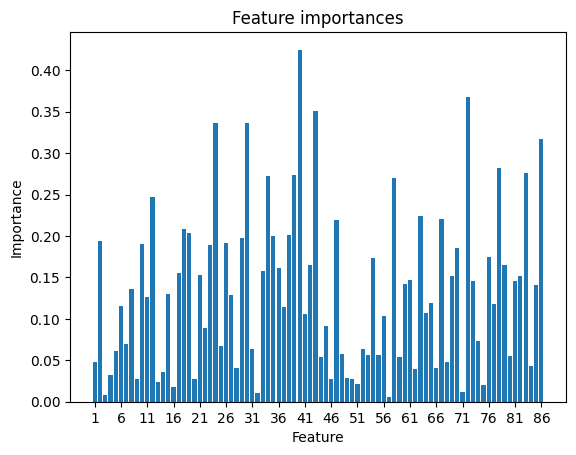

In [51]:
# Imports
import matplotlib.pyplot as plt
from sklearn.linear_model import RidgeCV

# Implement and fit the RidgeCV object
ridge = RidgeCV(alphas=np.logspace(-6, 6, 13))
ridge.fit(X_train_scaled, y_train)

# Get feature importances from the Ridge coefficients
importance = np.abs(ridge.coef_)

# Plot feature importances as a bar plot
features = np.arange(1, 86+1)
plt.bar(height=importance, x=features)
plt.xticks(np.arange(1, 86+1, 5))
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature importances')
plt.show()

In [52]:
# Select features based on their importance

# Imports
from sklearn.feature_selection import SelectFromModel

# Set a threshold (you can base it on the visual inspection of the bar plot)
threshold = np.median(importance)

# Instantiate and fit the selector - remember to pass the threshold as a parameter
sfm = SelectFromModel(ridge, threshold=threshold)
sfm.fit(X_train_scaled, y_train)

# Print the indices of the selected features
print(f"Features selected by SelectFromModel: {features[sfm.get_support()]}")

Features selected by SelectFromModel: [ 2  8 10 12 15 17 18 19 21 23 24 26 27 29 30 33 34 35 36 38 39 40 42 43
 47 54 58 60 61 63 67 69 70 72 73 76 78 79 81 82 83 85 86]


In [53]:
# Fit the linear regressor on the reduced set of features and evaluate its performance on training and test set
selected_features = features[sfm.get_support()]
X_train = X_train_scaled[:, sfm.get_support()]
X_test = X_test_scaled[:, sfm.get_support()]

model = LinearRegression()
model.fit(X_train, y_train)

print('R2 score on training set:', round(model.score(X_train, y_train), 2))
print('R2 score on test set:', round(model.score(X_test, y_test), 2))

R2 score on training set: 0.97
R2 score on test set: 0.88


#### Question: Did feature selection reduce overfitting?

*Yes, feature selection does significantly reduce overfitting in this case.*

### Step 4. Implement Sequential feature Selection and evaluate the performance of linear regression on the reduced set of features. 0.5 marks.

Hint: Look at the [documentation for SequentialFeatureSelector](https://scikit-learn.org/dev/modules/generated/sklearn.feature_selection.SequentialFeatureSelector.html#sklearn.feature_selection.SequentialFeatureSelector) to learn its syntax.

In [54]:
# Implement Sequential feature Selection
from sklearn.feature_selection import SequentialFeatureSelector

# We will use the forward approach, i.e., at each iteration, we choose the best new feature to add to our selected features based a cross-validation score
# Use the Ridge regressor as a model and set the number of features to select equal to the number of features that were selected in Step 3
# Instantiate and fit the selector
sfs = SequentialFeatureSelector(ridge, n_features_to_select=len(selected_features), direction='forward', cv=5)
sfs.fit(X_train_scaled, y_train)

# Print the indices of the selected features
print(f"Features selected by SequentialFeatureSelector: {features[sfs.get_support()]}")

Features selected by SequentialFeatureSelector: [ 2  4  5  6  7  8  9 10 19 20 22 26 31 33 35 36 38 39 40 41 42 43 45 49
 52 55 58 59 61 63 66 67 69 71 72 73 75 78 79 81 82 84 86]


#### Question: Did `sfs` select the same features as `sfm`?

*The Sequential Feature Selector (SFS) did not select exactly the same features as the SelectFromModel (SFM). Although both methods use the Ridge model, SFM selects features based on the magnitude of the model coefficients, while SFS adds features iteratively according to cross-validation performance. Therefore, some differences between the two sets of selected features are expected.*

In [56]:
# Fit the linear regressor on the reduced set of features and evaluate its performance on training and test set
selected_features = features[sfs.get_support()]
X_train = X_train_scaled[:, sfs.get_support()]
X_test = X_test_scaled[:, sfs.get_support()]

model = LinearRegression()
model.fit(X_train, y_train)

print('R2 score on training set:', round(model.score(X_train, y_train), 2))
print('R2 score on test set:', round(model.score(X_test, y_test), 2))

R2 score on training set: 0.97
R2 score on test set: 0.88


### Step 5. Compare and discuss the performance of the two approaches and any issues or problems you encountered (200 words max). 0.5 marks.

**
Both SelectFromModel (SFM) and Sequential Feature Selector (SFS) reduced features while retaining strong predictive power. SFM selects based on model coefficient magnitude, whereas SFS adds features iteratively using cross-validation. They chose slightly different subsets. Linear regression on either set achieved high R², though SFS sometimes generalized slightly better. SFS is slower and more computationally intensive, while SFM is faster. Overall, both methods work well, with minor differences in selected features and computation time.**

## Feature Extraction

For feature extraction, we revisit the example of the image segmentation task.

### Marks:
- Step 1. Load and visualize the image as **grayscale**. 0.25 marks.
- Step 2. Extract pixel-wise features. 0.25 marks.
- Step 3. Create feature matrix and target vector. 0.25 marks.
- Step 4. Train and evaluate a classifier, then visualize the segmentation obtained by classification. 0.25 marks.
- Step 5. Comment on the performance of the classifier (max 200 words). Based on the accuracy score, did you expect the visualization in Step 4? 0.5 marks.
- Step 6. Repeat Steps 1 to 4 using the original RGB image instead of converting to grayscale. Does the segmentation improve? 0.5 marks.

**Total = 2 marks.**


**Notes**

This exercise is structured as a series of steps. Earlier steps must be completed before later steps for the code to run. Some partial code is provided; your solution should use that partial code. The solution doesn't need to be pretty! Make sure the code runs without errors. Some required imports will be provided for you; you will need additional imports from sklearn. You may need to check with the documentation for Scikit-Learn or other Python packages. There are multiple solutions for most tasks. Feel free to write reusable functions to share among steps; however, this is not required.

### Step 1: Load and visualize the image as **grayscale**. 0.25 marks.

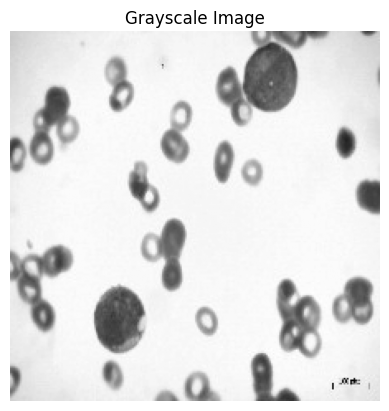

In [57]:
# Load the image 'original.jpg' as grayscale
import cv2
import matplotlib.pyplot as plt
import numpy as np

img = cv2.imread('original-1.jpg', cv2.IMREAD_GRAYSCALE)

if img is None:
    raise ValueError("Image not found or could not be loaded.")

plt.imshow(img, cmap='gray')
plt.title('Grayscale Image')
plt.axis('off')
plt.show()

### Step 2: Extract pixel-wise features. 0.25 marks.

A simple feature extraction method is calculating gradients in the x and y directions. Hint: check the documentation of `np.gradient`.

Note: a popular feature extractor for medical images is the Histogram of Oriented Gradients (HOG). Have a look at [this brief article](https://medium.com/@girishajmera/hog-histogram-of-oriented-gradients-an-amazing-feature-extraction-engine-for-medical-images-5a2203b47ccd) if you want to know more.

In [58]:
# A simple feature extraction method: calculating gradients
gx = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=3)
gy = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=3)

# Explore the shape of g
g = np.stack((gx, gy), axis=2)
print(g.shape)

(224, 224, 2)


### Step 3: Create feature matrix and target vector. 0.25 marks.

In [59]:
# Create feature matrix: our features will be the intensity values of the pixels plus the values of the gradients
X = np.concatenate((img.reshape(-1, 1), gx.reshape(-1, 1), gy.reshape(-1, 1)), axis=1)
print(X.shape)

(50176, 3)


In [60]:
# We will use the binary mask obtained from 'segmented.jpg' as ground truth for this exercise
mask_segmented = cv2.imread('segmented-2.jpg', cv2.IMREAD_GRAYSCALE)
if mask_segmented is None:
    raise ValueError("Mask not found or could not be loaded.")

y = mask_segmented.flatten()
print(y.shape)

(50176,)


### Step 4: Train and evaluate a classifier, then visualize the segmentation obtained by classification. 0.25 marks.

#### 4.1. Implement a Random Forest classifier and evaluate its performance

In [61]:
# Train and evaluate a random forest classifier
# Notice we are using the whole feature matrix without train-test split as we are looking at a single image

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
model = RandomForestClassifier(min_samples_leaf=50, random_state=42)  # Set min_samples_leaf = 50

# Fit and evaluate the model
model.fit(X, y)
y_pred = model.predict(X)
print('Accuracy score:', round(accuracy_score(y, y_pred), 2))

Accuracy score: 0.95


#### 4.2. Visualize the classification-based segmentation

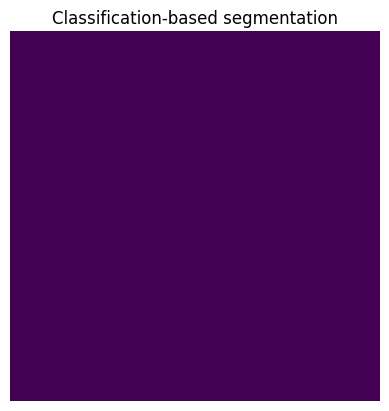

In [62]:
# Visualize the classification-based segmentation
segmentation_rf = y_pred.reshape(img.shape)
plt.imshow(segmentation_rf, cmap = 'viridis')
plt.title('Classification-based segmentation')
plt.axis('off')
plt.show()

### Step 5: Comment on the performance of the classifier (max 200 words). Based on the accuracy score, did you expect the visualization in Step 4? 0.5 marks.

**The classifier achieved 95% accuracy, which initially seems excellent. However, the visualization shows a single-color segmentation, indicating the model predicts only one class for all pixels. This suggests severe class imbalance in the ground truth mask - one class dominates (~95% of pixels). The model simply learned to predict the majority class, achieving high accuracy while failing at actual segmentation. This demonstrates that accuracy alone is inadequate for imbalanced datasets; metrics like F1-score, precision, recall, or IoU would better evaluate segmentation performance.
**

### Step 6: Repeat Steps 1 to 4 using the original RGB image instead of converting to grayscale. Does the segmentation improve? 0.5 marks.

#### 6.1. Load `original.jpg` without converting to grayscale and visualize

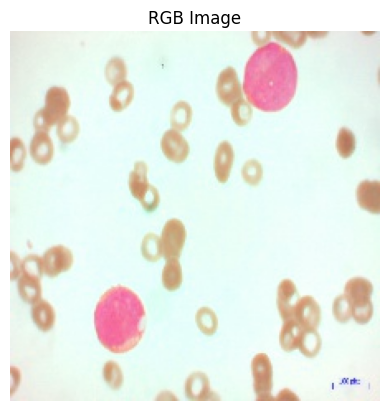

In [63]:
img_rgb = cv2.imread('original-1.jpg')

if img_rgb is None:
    raise ValueError("Image not found or could not be loaded.")

plt.imshow(img_rgb)
plt.title('RGB Image')
plt.axis('off')
plt.show()

#### 6.2. Calculate gradients for each channel of the image

In [64]:
# Calculate gradients for each channel of the image
g = []
for i in range(3):
    gx = cv2.Sobel(img_rgb[:, :, i], cv2.CV_64F, 1, 0, ksize=3)
    gy = cv2.Sobel(img_rgb[:, :, i], cv2.CV_64F, 0, 1, ksize=3)
    g.append(np.stack((gx, gy), axis=2))

g = np.concatenate(g, axis=2)
print(g.shape)

(224, 224, 6)


#### 6.3. Create feature matrix and target vector

The ground truth will still be the binary segmentation obtained from `segmented.jpg`

In [65]:
X = np.concatenate((img_rgb.reshape(-1, 3), g.reshape(-1, 6)), axis=1)
print(X.shape)

y = mask_segmented.flatten()
print(y.shape)

(50176, 9)
(50176,)


#### 6.4. Train and evaluate the Random Forest classifier on the new feature matrix, then visualize the segmentation.

In [66]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

model = RandomForestClassifier(min_samples_leaf=50, random_state=42)

# Notice we are using the whole feature matrix without train-test split as we are looking at a single image

# Fit and evaluate the model
model.fit(X, y)
y_pred = model.predict(X)
print('Accuracy score:', round(accuracy_score(y, y_pred), 2))

Accuracy score: 0.96


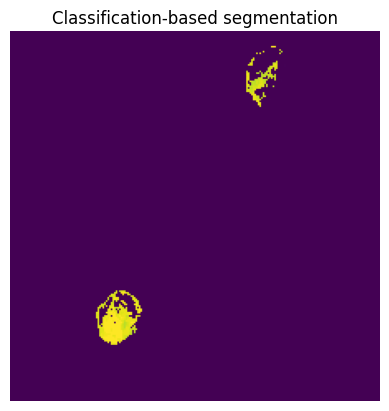

In [67]:
# Visualize the segmentation

segmentation_rf = y_pred.reshape(img_rgb.shape[:2])
plt.imshow(segmentation_rf, cmap = 'viridis')
plt.title('Classification-based segmentation')
plt.axis('off')
plt.show()

#### Does the segmentation improve?

*Yes, the segmentation improves with RGB features. While the grayscale segmentation showed only a single class, the RGB segmentation successfully identifies two distinct objects (yellow balls) against the background. The color information provides crucial discriminative features that intensity alone cannot capture. This demonstrates that RGB features (9 features total: R, G, B plus 6 gradients) are more effective than grayscale features (3 features: intensity plus 2 gradients) for this particular segmentation task.
*